<a href="https://colab.research.google.com/github/egs1sos/IS-4487/blob/main/assignment_06_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_6_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [ ]:
# Import necessary libraries 🔧
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load your uploaded file (path "/content/listings.csv.gz") 🔧
url = '/content/listings.csv.gz'
df = pd.read_csv(url)


## 2. Explore Missing Values

Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



<Axes: >

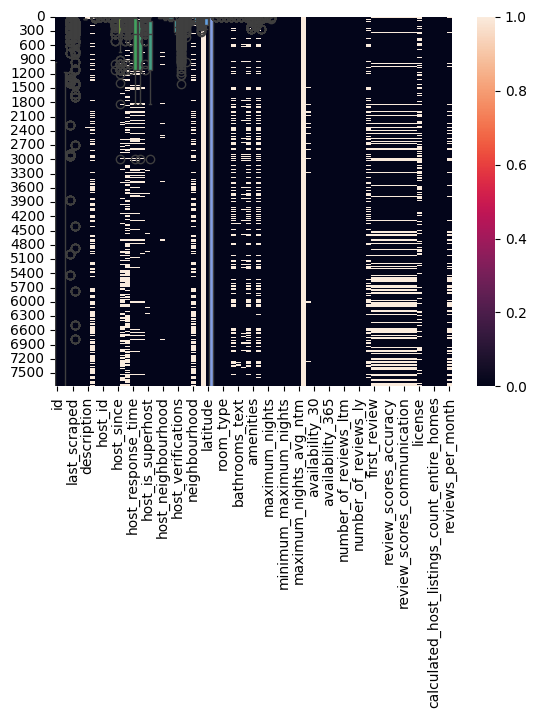

In [ ]:
# Add code here 🔧
df.isna().sum()
sns.boxplot(data=df)
sns.heatmap(df.isna())


### ✍️ Your Response: 🔧
1. It looks like the reviews_per_month, host_response_time and neighbourhood columns are missing the most values

2. Not knowing the reviews per month and host response time makes it hard for Airbnb to gauge customer satisfaction

3. The columns that are completely empty like latitude can be dropped


## 3. Drop Columns That Aren’t Useful

Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [ ]:
# Add code here 🔧
df.drop(columns=['latitude', 'maximum_nights_avg_ntm'], inplace=True)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20250901181253,2025-09-01,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/be1bf5ac-a955...,1169,...,4.89,4.98,4.78,STR-0006854,f,1,1,0,0,2.53
1,5858,https://www.airbnb.com/rooms/5858,20250901181253,2025-09-01,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/hosting/Hosti...,8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.53
2,8014,https://www.airbnb.com/rooms/8014,20250901181253,2025-09-01,city scrape,female HOST quiet fast internet market parking,Room is on the second floor so it gets a good ...,"The neighborhood is very residential, close to...",https://a0.muscache.com/pictures/2cc1fc3d-0ae0...,22402,...,4.94,4.59,4.66,STR-0000974,f,3,0,3,0,0.57
3,8142,https://www.airbnb.com/rooms/8142,20250901181253,2025-09-01,city scrape,*FriendlyRoom Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/hosting/Hosti...,21994,...,4.80,4.70,4.70,NaN,f,20,0,20,0,0.07
4,8339,https://www.airbnb.com/rooms/8339,20250901181253,2025-09-01,city scrape,Historic Alamo Square Victorian,"For creative humans who love art, space, photo...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,1,1,0,0,0.13


### ✍️ Your Response: 🔧
1. I dropped "latitude" and "maximum_nights_avg_ntm."

2. Both those columns were completely empty.

3. If those columns were left in, it would make the entire dataset larger and more complex to handle.



## 4. Fill or Fix Values in Key Columns

Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [ ]:
# Your code for converting column data types 🔧
df['flag'] = df['host_response_time'].isna()
df.fillna(df.mean(numeric_only = True))
df['flag'] = df['reviews_per_month'].isna()
df.fillna(df.mean(numeric_only = True))
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,flag
0,958,https://www.airbnb.com/rooms/958,20250901181253,2025-09-01,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/be1bf5ac-a955...,1169,...,4.98,4.78,STR-0006854,f,1,1,0,0,2.53,False
1,5858,https://www.airbnb.com/rooms/5858,20250901181253,2025-09-01,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/hosting/Hosti...,8904,...,4.77,4.68,NaN,f,1,1,0,0,0.53,False
2,8014,https://www.airbnb.com/rooms/8014,20250901181253,2025-09-01,city scrape,female HOST quiet fast internet market parking,Room is on the second floor so it gets a good ...,"The neighborhood is very residential, close to...",https://a0.muscache.com/pictures/2cc1fc3d-0ae0...,22402,...,4.59,4.66,STR-0000974,f,3,0,3,0,0.57,False
3,8142,https://www.airbnb.com/rooms/8142,20250901181253,2025-09-01,city scrape,*FriendlyRoom Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/hosting/Hosti...,21994,...,4.70,4.70,NaN,f,20,0,20,0,0.07,False
4,8339,https://www.airbnb.com/rooms/8339,20250901181253,2025-09-01,city scrape,Historic Alamo Square Victorian,"For creative humans who love art, space, photo...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,4.94,4.75,STR-0000264,f,1,1,0,0,0.13,False


### ✍️ Your Response: 🔧
1. I decided to flag and impute the "host_response_time" and "reviews_per_month" columns.

2. I decided to use imputation, as it would replace the missing values with an average of the existing values.

3. The risks of imputation are that the average may not be representative of the data.


## 5. Convert and Clean Data Types

Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


In [ ]:
# Clean or adjust your dataset 🔧
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,flag
0,958,https://www.airbnb.com/rooms/958,20250901181253,2025-09-01,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/be1bf5ac-a955...,1169,...,4.98,4.78,STR-0006854,f,1,1,0,0,2.53,False
1,5858,https://www.airbnb.com/rooms/5858,20250901181253,2025-09-01,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/hosting/Hosti...,8904,...,4.77,4.68,NaN,f,1,1,0,0,0.53,False
2,8014,https://www.airbnb.com/rooms/8014,20250901181253,2025-09-01,city scrape,female HOST quiet fast internet market parking,Room is on the second floor so it gets a good ...,"The neighborhood is very residential, close to...",https://a0.muscache.com/pictures/2cc1fc3d-0ae0...,22402,...,4.59,4.66,STR-0000974,f,3,0,3,0,0.57,False
3,8142,https://www.airbnb.com/rooms/8142,20250901181253,2025-09-01,city scrape,*FriendlyRoom Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/hosting/Hosti...,21994,...,4.70,4.70,NaN,f,20,0,20,0,0.07,False
4,8339,https://www.airbnb.com/rooms/8339,20250901181253,2025-09-01,city scrape,Historic Alamo Square Victorian,"For creative humans who love art, space, photo...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,4.94,4.75,STR-0000264,f,1,1,0,0,0.13,False


### ✍️ Your Response: 🔧
1. I cleaned up the "price" column.

2. I converted the "price" column to a float and removed extra characters.

3. Making this column a float makes it easier to find averages and other measures from this column.

## 6. Remove Duplicate Records

Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [ ]:
# Add code here 🔧
df.duplicated()
df.drop_duplicates(keep='first', inplace=True)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,flag
0,958,https://www.airbnb.com/rooms/958,20250901181253,2025-09-01,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/be1bf5ac-a955...,1169,...,4.98,4.78,STR-0006854,f,1,1,0,0,2.53,False
1,5858,https://www.airbnb.com/rooms/5858,20250901181253,2025-09-01,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/hosting/Hosti...,8904,...,4.77,4.68,NaN,f,1,1,0,0,0.53,False
2,8014,https://www.airbnb.com/rooms/8014,20250901181253,2025-09-01,city scrape,female HOST quiet fast internet market parking,Room is on the second floor so it gets a good ...,"The neighborhood is very residential, close to...",https://a0.muscache.com/pictures/2cc1fc3d-0ae0...,22402,...,4.59,4.66,STR-0000974,f,3,0,3,0,0.57,False
3,8142,https://www.airbnb.com/rooms/8142,20250901181253,2025-09-01,city scrape,*FriendlyRoom Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/hosting/Hosti...,21994,...,4.70,4.70,NaN,f,20,0,20,0,0.07,False
4,8339,https://www.airbnb.com/rooms/8339,20250901181253,2025-09-01,city scrape,Historic Alamo Square Victorian,"For creative humans who love art, space, photo...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,4.94,4.75,STR-0000264,f,1,1,0,0,0.13,False


### ✍️ Your Response: 🔧 🔧
1. I did find duplicates.

2. I decided to drop all duplicates, but decided to keep the first entry to show its impact on the data.

3. Duplicate Airbnb listings can be bad because customers won't be sure which listing is the real listing.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [ ]:
# export csv here 🔧
df.to_csv('cleaned_airbnb_data.csv', index=False)

## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. The most surprising thing is the number of columns that had missing values.   
2. When I cleaned this dataset, I wanted to eliminate missing/duplicate values, but I still wanted them to be visible in a way. Therefore, I deleted duplicate values, but still kept the first entry.   
3. This cleaned dataset is easier to work with, and a smaller file size.   
4. I would look for outliers and either eliminate them, or transform them.   
5. This relates to my goal of using analytics in strategic management, as clean datasets make it easier to make decisions and are easier to work with.  


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_06_LastnameFirstname.ipynb"